<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [12]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [14]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [15]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical market data for the maximum available period
tesla_data = tesla_ticker.history(period="max")

# Reset the index to have the Date as a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())



        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with the name "Tesla Quarterly Revenue"
tables = soup.find_all('table')

# Iterate through tables to find the correct one
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue_table = table
        break

# Use pandas to read the HTML table into a DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Rename the columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Remove the dollar sign and commas from the Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Convert the Revenue column to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

# Display the last five rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

# Confirm the last entry in the table
print("Last entry:", tesla_revenue.iloc[-1])


          Date  Revenue
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-12-31      NaN
52  2009-09-30     46.0
53  2009-06-30     27.0
Last entry: Date       2009-06-30
Revenue          27.0
Name: 53, dtype: object


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [3]:

# Display the last five rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

          Date  Revenue
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-12-31      NaN
52  2009-09-30     46.0
53  2009-06-30     27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [12]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical market data for the maximum available period
gme_data = gme_ticker.history(period="max")

# Reset the index to have the Date as a column
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [13]:
# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with the name "GameStop Quarterly Revenue"
tables = soup.find_all('table')

# Iterate through tables to find the correct one
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

# Use pandas to read the HTML table into a DataFrame
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove the dollar sign and commas from the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Convert the Revenue column to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

# Confirm the last entry in the table
print("Last entry:", gme_revenue.iloc[-1])



          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709
Last entry: Date       2005-01-31
Revenue           709
Name: 61, dtype: object


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [8]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())


          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [22]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical market data for the maximum available period
tesla_data = tesla_ticker.history(period="max")

# Reset the index to have the Date as a column
tesla_data.reset_index(inplace=True)

# Filter data up to June 2021
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']


In [23]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical market data for the maximum available period
tesla_data = tesla_ticker.history(period="max")

# Reset the index to have the Date as a column
tesla_data.reset_index(inplace=True)

# Filter data up to June 2021
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with the name "GameStop Quarterly Revenue"
tables = soup.find_all('table')

# Iterate through tables to find the correct one
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

# Use pandas to read the HTML table into a DataFrame
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove the dollar sign and commas from the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Convert the Revenue column to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

# Confirm the last entry in the table
print("Last entry:", gme_revenue.iloc[-1])


          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709
Last entry: Date       2005-01-31
Revenue           709
Name: 61, dtype: object


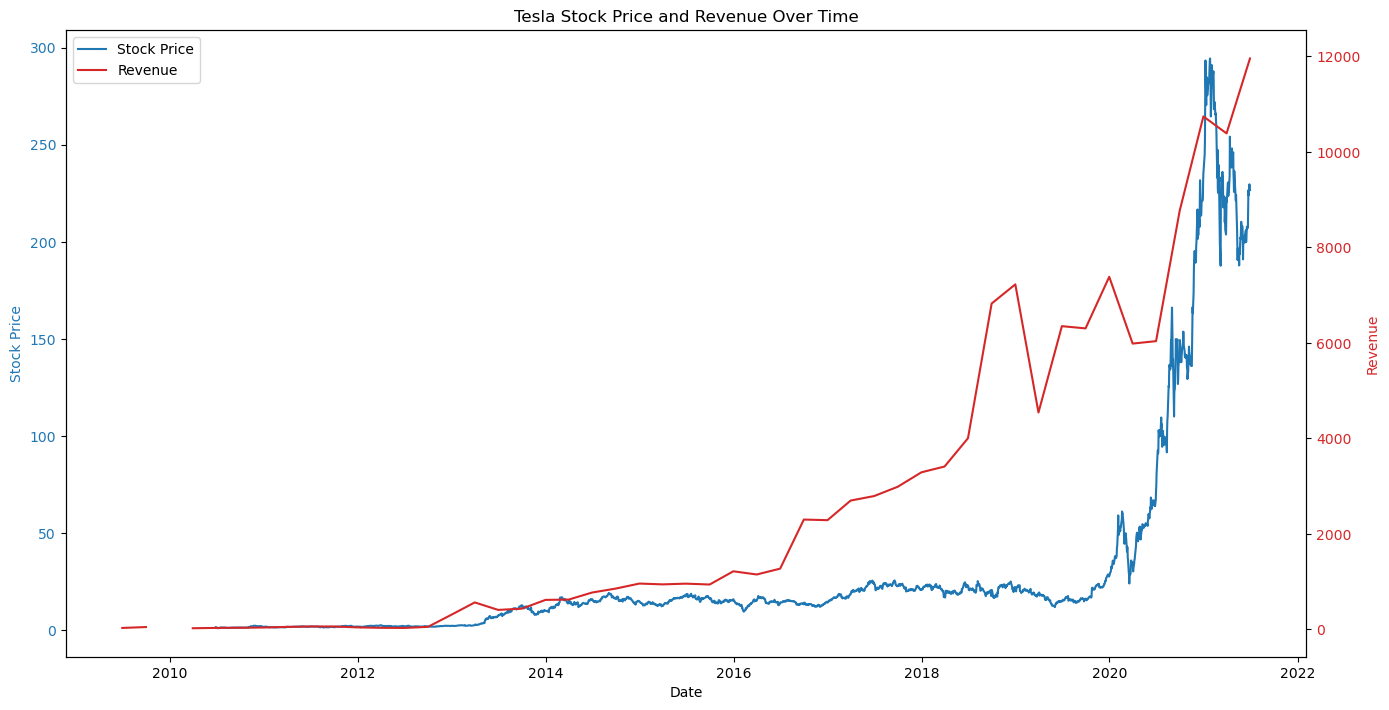

In [16]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the stock data on the first y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for the revenue data
    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Combine legends from both y-axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical market data for the maximum available period
tesla_data = tesla_ticker.history(period="max")

# Reset the index to have the Date as a column
tesla_data.reset_index(inplace=True)

# Filter data up to June 2021
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']

# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing the revenue data
tables = soup.find_all('table')
tesla_revenue_table = None

# Iterate through tables to find the correct one
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue_table = table
        break

# Use pandas to read the HTML table into a DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Rename the columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Remove the dollar sign and commas from the Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Convert the Revenue column to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

# Convert the Date column to datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filter revenue data up to June 2021
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Use the make_graph function to plot Tesla stock data with a title
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price and Revenue Over Time')



In [16]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [19]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical market data for the maximum available period
gme_data = gme_ticker.history(period="max")

# Reset the index to have the Date as a column
gme_data.reset_index(inplace=True)

# Filter data up to June 2021
gme_data = gme_data[gme_data['Date'] <= '2021-06-30']


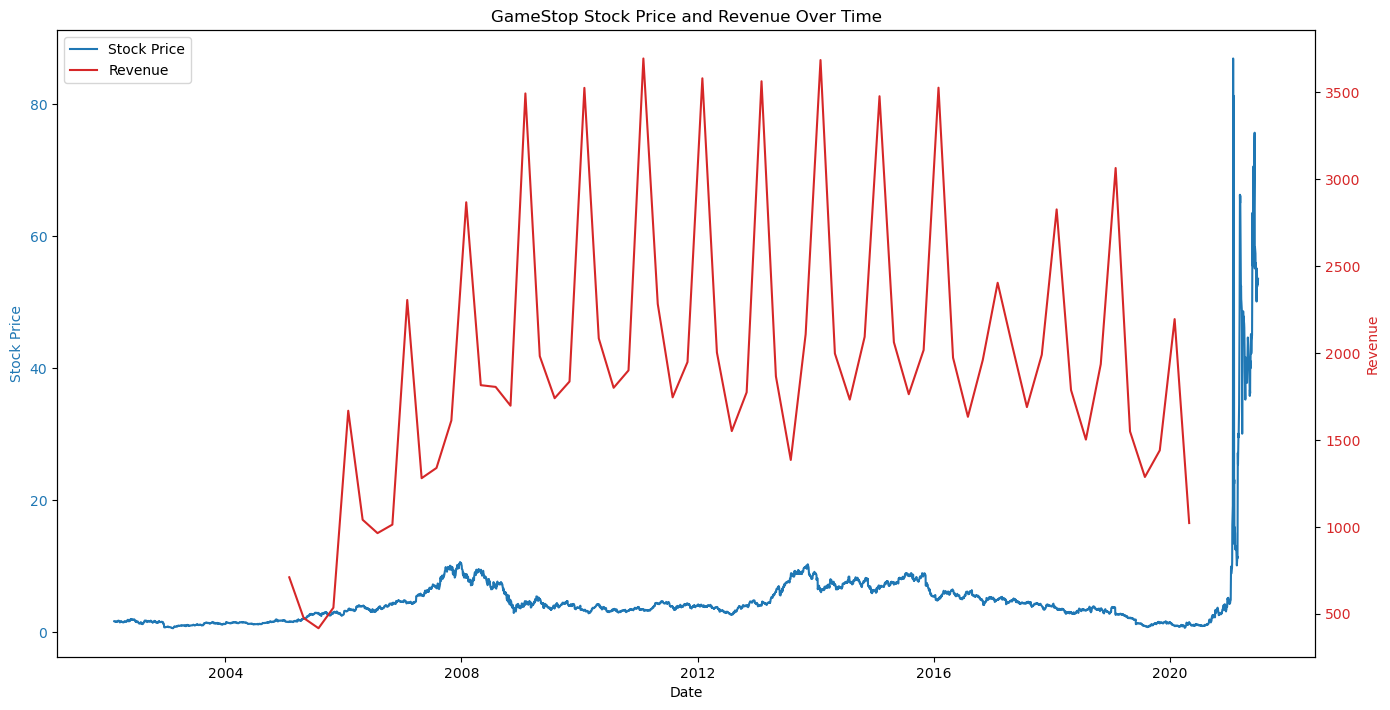

In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the stock data on the first y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for the revenue data
    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Combine legends from both y-axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical market data for the maximum available period
gme_data = gme_ticker.history(period="max")

# Reset the index to have the Date as a column
gme_data.reset_index(inplace=True)

# Filter data up to June 2021
gme_data = gme_data[gme_data['Date'] <= '2021-06-30']

# URL of the webpage containing GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a request to download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with the name "GameStop Quarterly Revenue"
tables = soup.find_all('table')
gme_revenue_table = None

# Iterate through tables to find the correct one
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

# Use pandas to read the HTML table into a DataFrame
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove the dollar sign and commas from the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Convert the Revenue column to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Convert the Date column to datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Filter revenue data up to June 2021
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Use the make_graph function to plot GameStop stock data with a title
make_graph(gme_data, gme_revenue, 'GameStop Stock Price and Revenue Over Time')


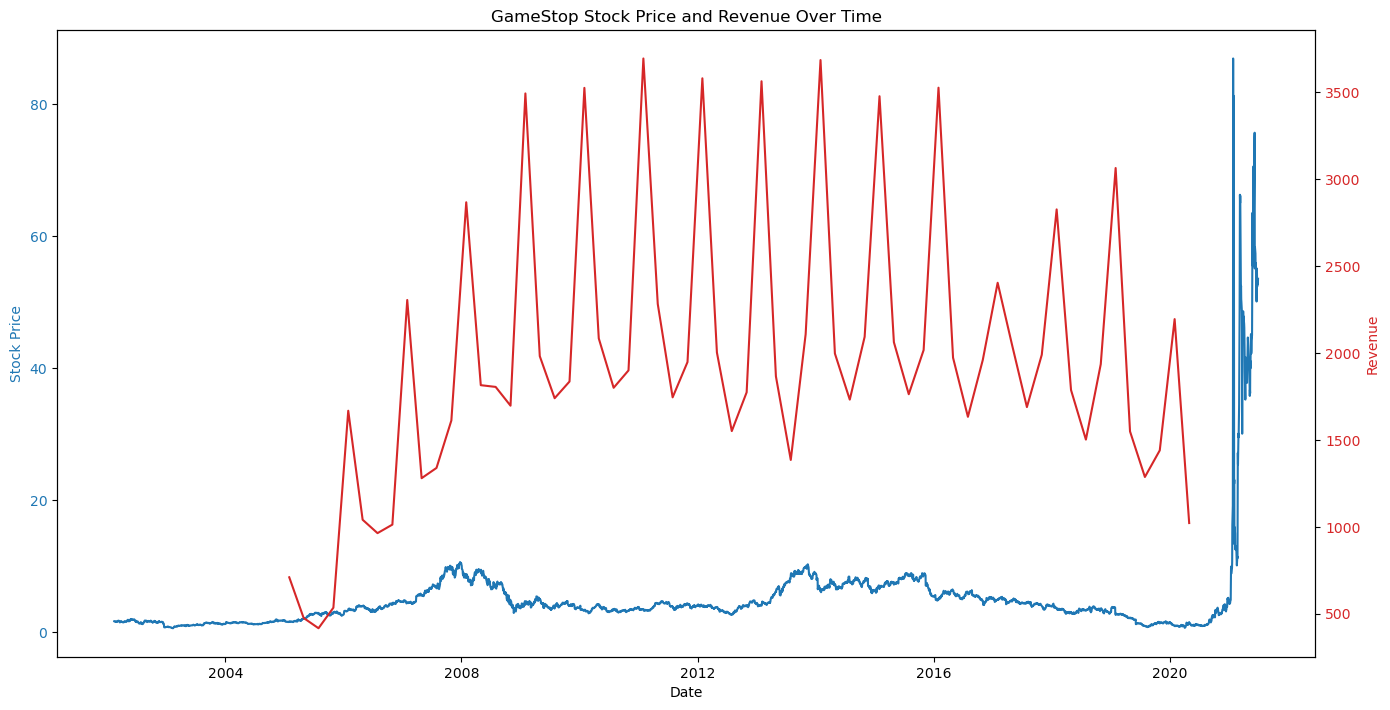

In [21]:
# Use the make_graph function to plot GameStop stock data with a title
make_graph(gme_data, gme_revenue, 'GameStop Stock Price and Revenue Over Time')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
